In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
%matplotlib inline

In [5]:
titanic=pd.read_csv(r"Dataset\tatanic_Logistic.csv")
print(titanic.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [85]:
print(titanic.info())
print(titanic.isnull())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4    

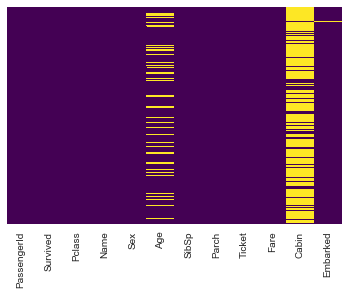

In [86]:
#see the missing values in heatmap
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()


In [87]:
# sns.distplot(titanic['Age'].dropna(),kde=False,bins=30,color='green')
# plt.show()



In [88]:
#titanic['Age'].plot.hist(bins=20)
#plt.show()

In [89]:
# sns.set_style('whitegrid')
# sns.countplot(x='Survived',data=titanic,hue='Sex')
# plt.show()

In [90]:
# sns.countplot(x='SibSp',data=titanic)
# plt.show()

In [91]:
# titanic['Fare'].hist(bins=20,figsize=(10,4))
# plt.show()


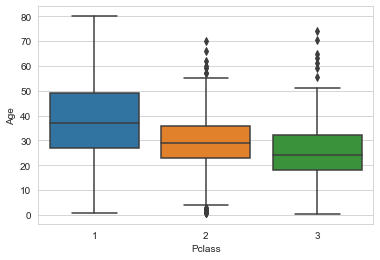

In [92]:
sns.boxplot(x='Pclass',y='Age',data=titanic)
plt.show()

In [93]:
#handle missing values in Age column
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24

    else:
        return Age

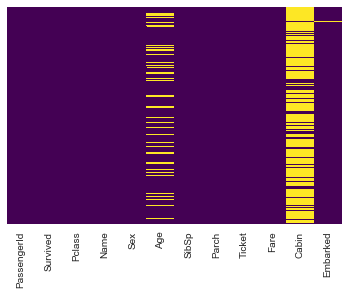

In [94]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

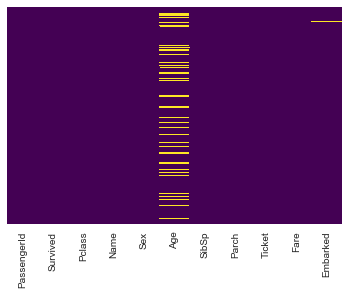

In [95]:
#handle missing values in Cabin column

titanic.drop('Cabin',axis=1,inplace=True)
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [99]:
#onely geting numeric values

titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
print("#@#@#@#@#@#",titanic.head(4))

#@#@#@#@#@#    PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000


In [100]:
titanic.drop(['PassengerId'],axis=1,inplace=True)
print(titanic.head())

   Survived  Pclass   Age  SibSp  Parch     Fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


In [101]:
print("test and train case ")

X=titanic.drop('Survived',axis=1)
Y=titanic['Survived']

test and train case 


In [102]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=102)

In [103]:
from sklearn.linear_model import LogisticRegression

lm=LogisticRegression()
lm.fit(x_train,y_train)


c:\users\sreek\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
print("prediction values")
prediction=lm.predict(x_test)
print(prediction)

prediction values
[0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1
 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0]


In [105]:
from sklearn.metrics import classification_report
a=classification_report(y_test, prediction)
print(a)

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       131
           1       0.70      0.52      0.60        83

    accuracy                           0.73       214
   macro avg       0.72      0.69      0.70       214
weighted avg       0.73      0.73      0.72       214



In [106]:
print("confusion matrix")
from  sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,prediction))

confusion matrix
[[113  18]
 [ 40  43]]
